## Data Understanding

### Numerical data in 16/21 columns

**account length** - the duration of time the client has been active

**area code** - area code of client residence

**number vmail messages** - total vmail messages sent by client

**total day minutes** - total day minutes used by client

**total day calls** - total number of day calls made

**total day charge** - total charge for the day calls

**total eve minutes** - total evening minutes used by client

**total eve calls** - total number of evening calls made

**total eve charge** - total charge for the evening calls

**total night minutes** - total night minutes used by client

**total night calls**- total number of night calls made

**total night charge** - total charge forthe night calls

**total intl minutes** - total international minutes used by the client

**total intl calls**- total number of international calls made

**total intl charge**- total charge for the international calls

**customer service calls** - total number of calls made by client to the customer service

### Categorical data in 5/21 columns

**state** - this is the state where the client resides

**phone number** - the phone contact of the client

**international plan** - for a client who has subscribed to an international plan

**voice mail plan** - for a client who has subscribed to a voicemail plan

**churn** - status of a client as either churned(True) or not churned(False) Syriatel company services

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import  GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [2]:
df= pd.read_csv('Data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(3333, 21)

In [4]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [6]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in this dataset

In [7]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The above dataframe gives the count, mean, std deviation,min and max value, and the 25th, 50th and 75th quartile

## Exploratory Data Analysis

### Exploring customer churn column

In [8]:
#getting customer churn count
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [9]:
# percentage of customers that churn
churned=df[df['churn']==True].shape[0]
not_churned=df[df['churn']==False].shape[0]
print(churned/(churned+not_churned))

0.14491449144914492


<AxesSubplot:xlabel='churn', ylabel='count'>

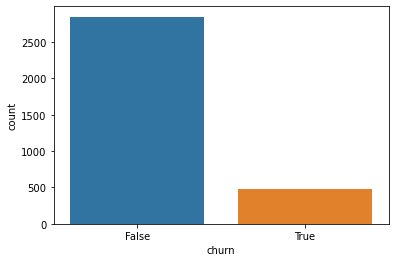

In [10]:
#getting churn visualization
sns.countplot(x='churn', data=df)

### Bar plot of top 15 states with the highest churn rate

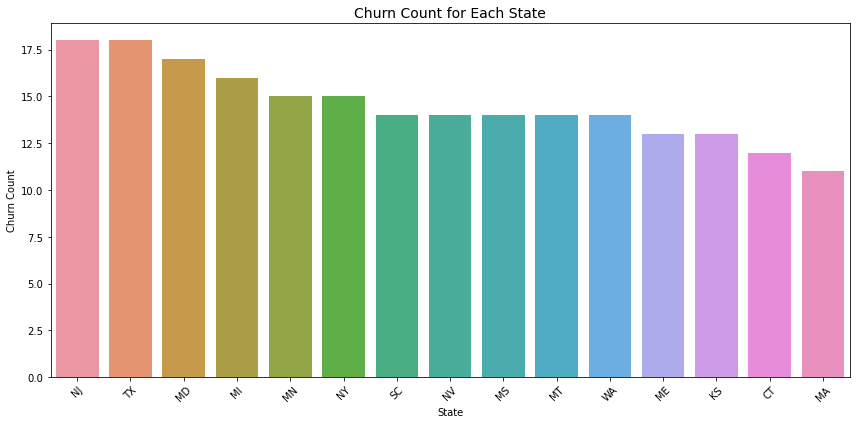

In [11]:
# bar plot of customers who churned
# getting churned df
churned_df = df[df['churn'] == True]

# getting churn counts for each state for churned customers
churn_counts = churned_df['state'].value_counts().sort_values(ascending=False)
top_15=churn_counts.head(15)
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot churn  for each state  in descending order
sns.barplot(x=top_15.index, y=top_15.values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels 
plt.xlabel('State')
plt.ylabel('Churn Count')
plt.title('Churn Count for Each State', fontsize=14)

# display the plot
plt.tight_layout()  
plt.show()


### Bar plot of customers who did not churn

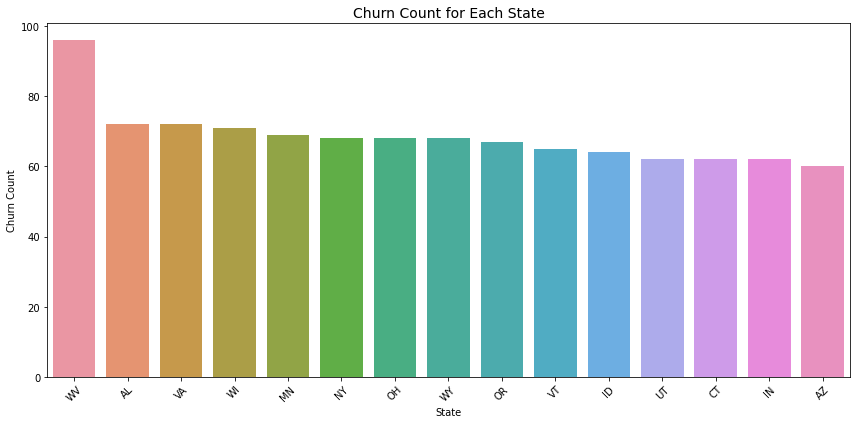

In [12]:
# bar plot of customers who did not churn
# getting customers that were retained df
non_churn_df = df[df['churn'] == False]

# getting non churn counts for each state for non churned customers
non_churn_counts = non_churn_df['state'].value_counts().sort_values(ascending=False)
top_15=non_churn_counts.head(15)
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot non churn  for each state  in descending order
sns.barplot(x=top_15.index, y=top_15.values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels 
plt.xlabel('State')
plt.ylabel('Churn Count')
plt.title('Churn Count for Each State', fontsize=14)

# display the plot
plt.tight_layout()  
plt.show()

<AxesSubplot:xlabel='customer service calls', ylabel='count'>

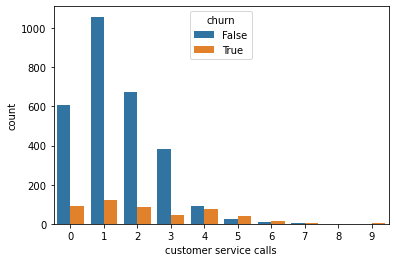

In [13]:
sns.countplot(x='customer service calls', hue='churn', data=df)

<AxesSubplot:xlabel='voice mail plan', ylabel='count'>

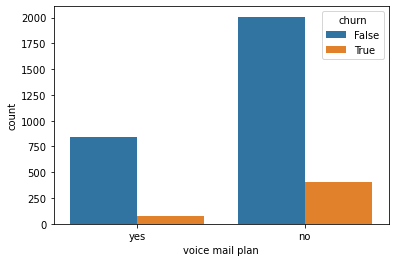

In [14]:
sns.countplot(x='voice mail plan', hue='churn', data=df)

<AxesSubplot:xlabel='international plan', ylabel='count'>

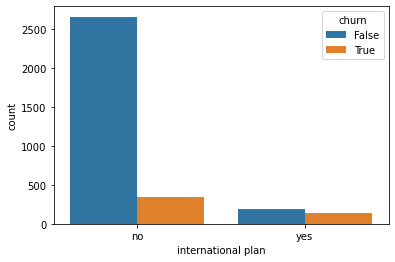

In [15]:
sns.countplot(x='international plan', hue='churn', data=df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [17]:
#getting dummies for categorical variable, state
dummy_state = pd.get_dummies(df['state'], prefix='state')  
#Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, dummy_state], axis=1)
 
# Dropping the original 'state' column
df = df.drop('state', axis=1)
 
df = df.replace({True: 1, False: 0})


In [18]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder
#label encoding categorical variables to binary
# instantiate the label encoder
label_encoder = LabelEncoder()
# perform encoding
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df['international plan'] = df['international plan'].astype('int64')
df['voice mail plan'] = df['voice mail plan'].astype('int64')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 71 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   int64  
 4   voice mail plan         3333 non-null   int64  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

Below, we will be dropping phone number column since we won't need it

In [20]:
# dropping phone number column
df.drop(['phone number'], axis=1, inplace=True)

In [21]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# checking the columns again
df.columns

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'state_AK',
       'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA',
       'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH',
       'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN',
       'stat

In [23]:
# checking the data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

## Feature Engineering

In [24]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


### Getting new features

We will come up with columns with the features, for total call duration, avergerage charge per local and international calls, total charges and tenure years.

In [25]:
# Create new feature for total call duration 
df['total_call_duration'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']
#getting average call charges for international 
# Calculate average charge per call for international calls
df['average_charge_per_intl_call'] = df['total intl charge'] / df['total intl calls']
#getting average call charges for local
# Calculate average charge per call for local calls
local_call_charges= ['total day charge', 'total eve charge', 'total night charge']
total_local_call_charges= df[local_call_charges].sum(axis=1)
total_local_calls = df[['total day calls', 'total eve calls', 'total night calls']].sum(axis=1)
df['average_charge_per_local_call'] = total_local_call_charges / total_local_calls

# Calculate total charges
df['total_charges'] = (df['total day charge'] + df['total eve charge'] +
                       df['total night charge'] + df['total intl charge'])

# Convert account length to tenure in years
df['tenure_years'] = df['account length'] / 12



In [26]:
#checking our updated data frame
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,total_call_duration,average_charge_per_intl_call,average_charge_per_local_call,total_charges,tenure_years
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,717.2,0.900000,0.242867,75.56,10.666667
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,625.2,1.233333,0.168815,59.24,8.916667
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,539.4,0.658000,0.179878,62.29,11.416667
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,564.8,0.254286,0.262177,66.80,7.000000
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,512.0,0.910000,0.138652,52.09,6.250000


In [27]:
df.isnull().sum()

account length                    0
area code                         0
international plan                0
voice mail plan                   0
number vmail messages             0
                                 ..
total_call_duration               0
average_charge_per_intl_call     18
average_charge_per_local_call     0
total_charges                     0
tenure_years                      0
Length: 75, dtype: int64

After feature engineering, we notice that there is a column with some missing data, the 'average_charge_per_intl_call' column. We will therefore replace it with the median since it is less sensitive to outliers. 

In [28]:
imputer = SimpleImputer(strategy='median')

# Selecting the column to impute
column = ['average_charge_per_intl_call']

# Fit the imputer 
imputer.fit(df[column])

# Transform the column by replacing missing values with the median
df [column] = imputer.transform(df[column])

## Model Iterations

In [29]:
### 

In [30]:
#Prepare the data
X = df.drop('churn', axis=1)
y = df['churn']

### Dealing with class imbalance

In [31]:
# getting the class imbalance 
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

### Balancing the imbalanced class

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# balancing the classes using SMOTE
# instantiating SMOTE
smote = SMOTE(random_state=42)
# fitting SMOTE on our data set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [34]:
# seeing if class imbalance has been solved
pd.Series(y_train_resampled).value_counts()

1    2284
0    2284
Name: churn, dtype: int64

## Random Forest Model before Parameter Tuning

We will run Random Forest classifier with all features and default parameters to see how it perfors  before tuning it.

In [35]:
# Initialize the random forest classifier with default hyperparameters
basic_rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
basic_rf_model.fit(X_train_resampled, y_train_resampled)

# Making predictions on the test data
y_pred_basic_rf = basic_rf_model.predict(X_test)

# Calculating performance of the basic Random Forest model
basic_rf_accuracy = accuracy_score(y_test, y_pred_basic_rf)
basic_rf_precision = precision_score(y_test, y_pred_basic_rf)
basic_rf_recall = recall_score(y_test, y_pred_basic_rf)
basic_rf_f1 = f1_score(y_test, y_pred_basic_rf)
print("Basic RF Model Accuracy:", basic_rf_accuracy)
print("Basic RF Model precision:", basic_rf_recall)
print("Basic RF Model recall:", basic_rf_recall)
print("Basic RF Model f1:", basic_rf_f1)

Basic RF Model Accuracy: 0.9565217391304348
Basic RF Model precision: 0.7425742574257426
Basic RF Model recall: 0.7425742574257426
Basic RF Model f1: 0.8379888268156426


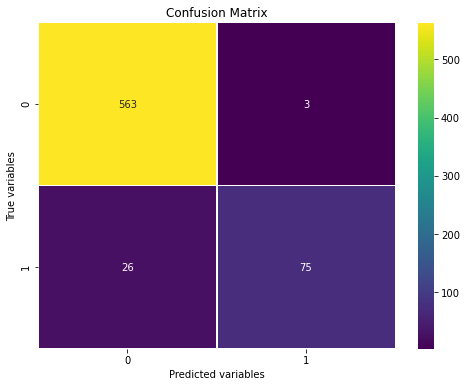

In [36]:
# visualizing model performance using confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_basic_rf)
# getting the figsize
plt.figure(figsize=(8, 6))
#plotting heatmap
sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d", linewidths=.5)
# setting the labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted variables")
plt.ylabel("True variables")
# displaying the data
plt.show()

## Random Forest Model after Parameter Tuning

We are going to run our model now, after tuning it to see if the performance improves after model tuning. We will use random search to find the best parameters for the model.

In [44]:
# Define a function to perform random search and evaluate the model
def perform_random_search(classifier, param_grid, X_train, X_test, y_train, y_test):
    # Define the pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])
    
    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1, verbose=2)
    random_search.fit(X_train_resampled, y_train_resampled)

    # Get the best parameters
    best_params = random_search.best_params_
    print("Best Parameters:", best_params)

    # Evaluate the model on the test set
    y_pred = random_search.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print evaluation metrics
    print("Test Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    return  best_params, accuracy, precision, recall, f1, y_pred


In [38]:
# getting the parameter grid
param_grid = {
    'classifier__n_estimators': np.arange(10, 101, 10),
    'classifier__max_depth': [None] + list(np.arange(5, 31, 5)),
    'classifier__min_samples_split': np.arange(2, 11),
    'classifier__min_samples_leaf': np.arange(1, 11),
    'classifier__max_features': ['sqrt', 'log2'],  
    'classifier__bootstrap': [True, False]}
# passing the arguments to our function
rf=RandomForestClassifier(random_state=42)
# Perform random search and evaluate the model
best_params, accuracy, precision, recall, f1 = perform_random_search(rf, param_grid, X_train, X_test, y_train, y_test)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'classifier__n_estimators': 70, 'classifier__min_samples_split': 6, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'log2', 'classifier__max_depth': 25, 'classifier__bootstrap': False}
Test Accuracy: 0.9475262368815592
Precision: 0.9459459459459459
Recall: 0.693069306930693
F1 Score: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.95      0.69      0.80       101

    accuracy                           0.95       667
   macro avg       0.95      0.84      0.88       667
weighted avg       0.95      0.95      0.94       667



ValueError: too many values to unpack (expected 5)

In [ ]:
# visualizing model performance using confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# getting the figsize
plt.figure(figsize=(8, 6))
#plotting heatmap
sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d", linewidths=.5)
# setting the labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted variables")
plt.ylabel("True variables")
# displaying the data
plt.show()


In [ ]:
# Plot the first 10 most important features
n_of_features = 10  
feature_importances = random_search.best_estimator_['classifier'].feature_importances_
# Get indices of top 10 features
indices = np.argsort(feature_importances)[::-1][:n_features]
# getting figsize
plt.figure(figsize=(12, 6))
# getting labels
plt.title("Top 10 Feature Importances")
plt.bar(range(n_features), feature_importances[indices], align="center", )
plt.xticks(range(n_features), X_train.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
